In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Generate a complex hypervector with random angles.
def generate_hypervector(dim):
    angles = np.random.uniform(0, 2 * np.pi, dim)
    return np.exp(1j * angles)  # e^(iθ)

# Generate hypervectors for symbols A-Z and axis (hx, hy)
symbols = []
for i in range(26):
    symbols.append(chr(ord('A') + i))  # Generate symbols A-Z
D = 1000
# Hypervectors for A-Z
codebook = {}  
for symbol in symbols:
    codebook[symbol] = generate_hypervector(D)
hx = generate_hypervector(D)  # Hypervector for axis hx
hy = generate_hypervector(D)  # Hypervector for axis hy



# Binding and Bundling Operations
def bind(hv1, hv2):
    return hv1 * hv2

def bundle(*hvs):
    sum_hv = sum(hvs)
    return sum_hv / np.abs(sum_hv)  # Normalize to keep on unit circle

# Similarity Computation
def similarity(hv1, hv2):
    return np.real(np.dot(hv1.conj(), hv2)) / len(hv1)

# Fractional Power Encoding
def fractional_power(hv, alpha):
    return np.exp(1j * alpha * np.angle(hv))



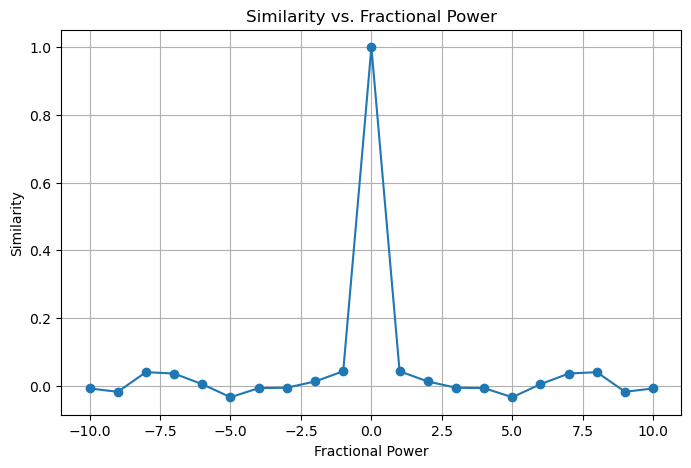

In [5]:
# Similarity vs. Fractional Power

alphas = np.linspace(-10, 10, 21)  # Range of fractional powers
similarities = []
for alpha in alphas:
    hx_alpha = fractional_power(hx, alpha)
    sim = similarity(bind(hx_alpha, hx), hx)
    similarities.append(sim)

plt.figure(figsize=(8, 5))
plt.plot(alphas, similarities, marker='o')
plt.xlabel("Fractional Power")
plt.ylabel("Similarity")
plt.title("Similarity vs. Fractional Power")
plt.grid()
plt.show()

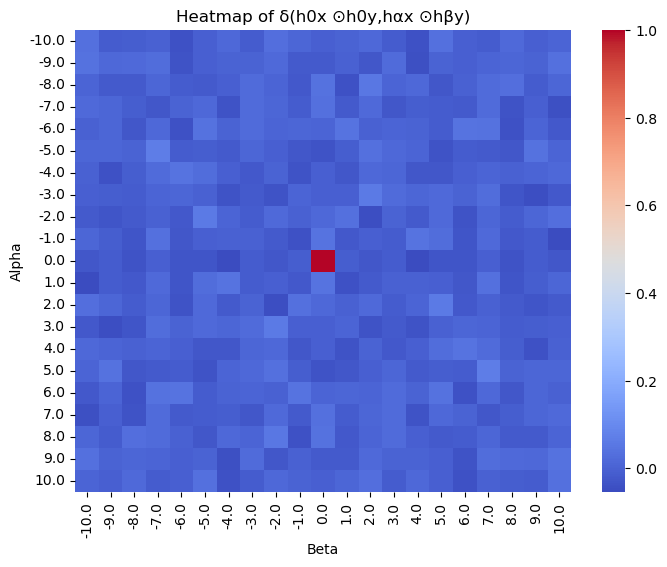

In [6]:
# Heatmap for similarity variations

betas = alphas
heatmap = np.zeros((len(alphas), len(betas)))
for i, alpha in enumerate(alphas):
    for j, beta in enumerate(betas):
        heatmap[i, j] = similarity(bind(fractional_power(hx, alpha), fractional_power(hy, beta)), bind(fractional_power(hx, 0),fractional_power(hy, 0)))

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap, xticklabels=np.round(betas, 2), yticklabels=np.round(alphas, 2), cmap='coolwarm')
plt.xlabel("Beta")
plt.ylabel("Alpha")
plt.title("Heatmap of δ(h0x ⊙h0y,hαx ⊙hβy)")
plt.show()


In [11]:
# Vector Symbolic Encoding

# Encoding position
def encode_position(letter_positions):
    encoded_vector = np.zeros_like(hx, dtype=complex)
    for letter, x_pos, y_pos in letter_positions:
        encoded_vector += bind(bind(codebook[letter], fractional_power(hx, x_pos)), fractional_power(hy, y_pos))
    return encoded_vector / np.abs(encoded_vector)  # Normalize

# codebook for the power of the axis (hx, hy)
position_codebook_x = {}
position_codebook_y = {}
for i in range(-20,21):
    position_codebook_x[i] = fractional_power(hx, i)
    position_codebook_y[i] = fractional_power(hy, i)

# Example encoding
test_encoding = encode_position([("A", 2, 5), ("B", 6, 10)])
print("Original: ('A', 2, 5), ('B', 6, 10)")

# Decoding
def decode_position(encoded_vector):
    decoded_symbols = {}
    for x,hx_code in position_codebook_x.items():
        for y,hy_code in position_codebook_y.items():
            unbind_vector = bind(encoded_vector,bind(np.conj(hx_code),np.conj(hy_code)))
            
            for symbol, hv in codebook.items():
                sim = similarity(unbind_vector, hv)
                if sim > 0.1:  # Threshold for similarity
                    decoded_symbols[symbol] = (x,y,sim)

    return decoded_symbols

# Decoding the test encoding
print("Decoded_symbols:", decode_position(test_encoding))


Original: ('A', 2, 5), ('B', 6, 10)
Decoded_symbols: {'A': (2, 5, 0.6304587647896497), 'B': (6, 10, 0.6304587647896495)}


In [12]:
# Vector Functin Algebra

def translate(encoded_vecotr, x_shift, y_shift):
    # Create the translation hypervector
    translation_hv = bind(fractional_power(hx, x_shift), fractional_power(hy, y_shift))
    translated_vector = bind(encoded_vecotr, translation_hv)
    return translated_vector / np.abs(translated_vector)

# Example translation
translation_vector = translate(test_encoding, -2, 2)


# Decoding the translation
decoded_translation = decode_position(translation_vector)
print("Original: ('A', 2, 5), ('B', 6, 10)")
print("Decoded_translation:", decoded_translation)

Original: ('A', 2, 5), ('B', 6, 10)
Decoded_translation: {'A': (0, 7, 0.6304587647896498), 'B': (4, 12, 0.6304587647896492)}
